In [13]:
from Concept_Network import *
from Analysis import *
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
from matplotlib.colors import LogNorm
import itertools
import powerlaw
from nltk.collocations import *
import traces
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
CN1 = Concept_Network()
t1 = CN1.cooc_for_text('Axler', 10)#, groups=Ci)#, groups=C)
CN2 = Concept_Network()
t2 = CN2.cooc_for_text('Edwards', 10)
CN3 = Concept_Network()
t3 = CN3.cooc_for_text('Lang', 8)
CN4 = Concept_Network()
t4 = CN4.cooc_for_text('Petersen', 5)
CN5 = Concept_Network()
t5 = CN5.cooc_for_text('Robbiano', 8)
CN6 = Concept_Network()
t6 = CN6.cooc_for_text('Bretscher', 9)
CN7 = Concept_Network()
t7 = CN7.cooc_for_text('Greub', 13)
CN8 = Concept_Network()
t8 = CN8.cooc_for_text('Hefferson', 5)
CN9 = Concept_Network()
t9 = CN9.cooc_for_text('Strang', 8)
CN0 = Concept_Network()
t0 = CN0.cooc_for_text('Wrong', 9)
texts = ['Wrong', 'Axler', 'Edwards', 'Lang', 'Petersen', 'Robbiano', 
         'Bretscher', 'Greub', 'Hefferson', 'Strang']

Yield percent: 1.0
Yield percent: 1.0


Yield percent: 1.0
Yield percent: 1.0


Yield percent: 1.0
Yield percent: 1.0


Yield percent: 1.0
Yield percent: 1.0


Yield percent: 1.0
Yield percent: 1.0


Yield percent: 1.0
Yield percent: 1.0


Yield percent: 0.9981851179673321
Yield percent: 1.0


Yield percent: 1.0
Yield percent: 1.0


Yield percent: 0.998898678414097
Yield percent: 1.0


Yield percent: 0.9982046678635548
Yield percent: 1.0


Let's save the texts themselves.

In [18]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    np.save('Textbooks/{}/clean_text.npy'.format(texts[i]), CN.text)

Wrong
Axler
Edwards
Lang
Petersen
Robbiano
Bretscher
Greub
Hefferson
Strang


First, we generate the actual sentence-granularity persistent homology for the true networks:

In [3]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    bars = CN.get_barcode(CN.dist_mat)
    np.save('Textbooks/{}/sentence_filtration.npy'.format(texts[i]),
            CN.dist_mat)
    np.save('Textbooks/{}/sentence_cooc.npy'.format(texts[i]),
            CN.cooc_mat)
    np.save('Textbooks/{}/sentence_bars.npy'.format(texts[i]), bars)

Wrong
Axler
Edwards
Lang
Petersen
Robbiano
Bretscher
Greub
Hefferson
Strang


Now we'll generate the continuous configuration null model graphs for each text, 100 for each

In [5]:
n_samples = 100
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    mats = []
    for _ in tqdm_notebook(range(n_samples)):
        mats.append(CN.cont_config_graph())
    mats = np.stack(mats)
    np.save('Textbooks/{}/cont_config_mats.npy'.format(texts[i]), mats)

Wrong


Axler


Edwards


Lang


Petersen


Robbiano


Bretscher


Greub


/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:3785: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


(2961.815154414708, 'burr', (1.8730344455584496, 1.1164968260333428, 0.08311840455578037, 0.5544594020718934))
Hefferson


(5544.187048301326, 'burr', (1.9149670314849019, 1.162527726552161, 0.05807704403318088, 0.5663001911919197))
Strang


(6257.799783959007, 'burr', (1.8802491006302402, 1.3173617446319799, 0.06702246191278417, 0.4979895175538734))


Now we'll generate the random index network null models: filtration matrices and cooccurrence matrices, and corresponding oaat-persistent homology

In [7]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    cooc_mats = []
    filt_mats = []
    oaat_mats = []
    all_bars = []
    for _ in tqdm_notebook(range(n_samples)):
        t = CN.random_index_null()
        cooc_mats.append(t[0]) # add the graph matrix
        filt_mats.append(t[1]) # need the sentence-granularity filtration
        # matrix for doing stuff with core-peri and community development
        # add the oaat filtration matrix
        oaat_mat, cutoff, _ = CN.oaat_filtration(t[1])
        oaat_mats.append(oaat_mat)
        # calculate barcode
        bars = CN.get_barcode(oaat_mat) 
        all_bars.append((cutoff, bars))
    cooc_mats = np.stack(cooc_mats)
    filt_mats = np.stack(filt_mats)
    oaat_mats = np.stack(oaat_mats)
    np.save('Textbooks/{}/r_ind_cooc_mats.npy'.format(texts[i]), cooc_mats)
    np.save('Textbooks/{}/r_ind_filt_mats.npy'.format(texts[i]), filt_mats)
    np.save('Textbooks/{}/r_ind_oaat_mats.npy'.format(texts[i]), oaat_mats)
    np.save('Textbooks/{}/r_ind_bars.npy'.format(texts[i]), all_bars)

Wrong


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Axler


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Edwards


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Lang


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Petersen


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Robbiano


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Bretscher


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Greub


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Hefferson


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Strang


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Yield percent: 1.0


Now we generate the random sentence order null models: filtration matrices and cooccurrence matrices, and corresponding oaat-persistent homology

In [106]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [104]:
n_samples = 100
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    cooc_mats = []
    filt_mats = []
    oaat_mats = []
    all_bars = []
    all_sent_bars = []
    for _ in tqdm_notebook(range(n_samples)):
        t, _ = CN.rnd_sent_ord_null()
        cooc_mats.append(t[0]) # add the graph matrix
        filt_mats.append(t[1]) # need the sentence-granularity filtration
        # matrix for doing stuff with core-peri and community development
        # add the oaat filtration matrix
        oaat_mat, cutoff, _ = CN.oaat_filtration(t[1])
        oaat_mats.append(oaat_mat)
        # calculate barcode
        bars = CN.get_barcode(oaat_mat) 
        all_bars.append((cutoff, bars))
        bars = CN.get_barcode(t[1])
        all_sent_bars.append(bars)
    cooc_mats = np.stack(cooc_mats)
    filt_mats = np.stack(filt_mats)
    oaat_mats = np.stack(oaat_mats)
    np.save('Textbooks/{}/r_sentord_cooc_mats.npy'.format(texts[i]), cooc_mats)
    np.save('Textbooks/{}/r_sentord_filt_mats.npy'.format(texts[i]), filt_mats)
    np.save('Textbooks/{}/r_sentord_oaat_mats.npy'.format(texts[i]), oaat_mats)
    np.save('Textbooks/{}/r_sentord_bars.npy'.format(texts[i]), all_bars)
    np.save('Textbooks/{}/r_sentord_sent_bars.npy'.format(texts[i]), all_sent_bars)

Wrong


Axler


Edwards


Lang


Petersen


Robbiano


Bretscher


Greub


Hefferson


Strang


In [105]:
# also generate sentence-granularity homology for random index
n_samples = 100
r_ind_filts = load_r_ind_filt_mats()
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    all_sent_bars = []
    for j in tqdm_notebook(range(n_samples)):
        bars = CN.get_barcode(r_ind_filts[i][j])
        all_sent_bars.append(bars)
    np.save('Textbooks/{}/r_ind_sent_bars.npy'.format(texts[i]), all_sent_bars)

Wrong


Axler


Edwards


Lang


Petersen


Robbiano


Bretscher


Greub


Hefferson


Strang


Now we generate the oaat-persistent homology for the actual texts; we also do 100 each for this, since we're taking random ordering for within-sentence ordering:

In [8]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    filt_mats = []
    all_bars = []
    for _ in tqdm_notebook(range(n_samples)):
        # get the oaat filtration
        oaat_mat, cutoff, _ = CN.oaat_filtration(CN.dist_mat)
        filt_mats.append(oaat_mat)
        # calculate the barcode
        bars = CN.get_barcode(oaat_mat)
        all_bars.append((cutoff, bars))
    filt_mats = np.stack(filt_mats)
    np.save('Textbooks/{}/oaat_filt_mats.npy'.format(texts[i]), filt_mats)
    np.save('Textbooks/{}/oaat_bars.npy'.format(texts[i]), all_bars)

Wrong


Axler


Edwards


Lang


Petersen


Robbiano


Bretscher


Greub


Hefferson


Strang


Now we generate the node-ordered filtration null models for persistent homology.

In [9]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    all_bars = []
    for _ in tqdm_notebook(range(n_samples)):
        # get the node-ordered filtration
        mat, cutoff = CN.node_ordered_filtration()
        bars = CN.get_barcode(mat)
        all_bars.append((cutoff, bars))
    np.save('Textbooks/{}/node_ord_bars.npy'.format(texts[i]), all_bars)

Wrong


Axler


Edwards


Lang


Petersen


Robbiano


Bretscher


Greub


Hefferson


Strang


Now we generate the random edge filtration null models for persistent homology.

In [10]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    all_bars = []
    for _ in tqdm_notebook(range(n_samples)):
        # get the random edge filtration
        mat, cutoff, _ = CN.rnd_edge_filtration()
        bars = CN.get_barcode(mat)
        all_bars.append((cutoff, bars))
    np.save('Textbooks/{}/rand_edge_bars.npy'.format(texts[i]), all_bars)

Wrong


Axler


Edwards


Lang


Petersen


Robbiano


Bretscher


Greub


Hefferson


Strang


And finally, we generate the topological distance filtration null models for persistent homology.

In [11]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    all_bars = []
    for _ in tqdm_notebook(range(n_samples)):
        # get the random edge filtration
        mat, cutoff = CN.topo_dist_filtration()
        bars = CN.get_barcode(mat)
        all_bars.append((cutoff, bars))
    np.save('Textbooks/{}/topo_dist_bars.npy'.format(texts[i]), all_bars)

Wrong


Axler


Edwards


Lang


Petersen


Robbiano


Bretscher


Greub


Hefferson


Strang


Just for kicks, we're gonna save all the index labels for each of the texts to file.

In [12]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    np.save('Textbooks/{}/index_labels.npy'.format(texts[i]), CN.index_labels)

Wrong
Axler
Edwards
Lang
Petersen
Robbiano
Bretscher
Greub
Hefferson
Strang


Also for kicks, we're gonna save the number of sentences of each text to file.

In [14]:
for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    np.save('Textbooks/{}/n_sents.npy'.format(texts[i]), 
            len(CN.text))

Wrong
Axler
Edwards
Lang
Petersen
Robbiano
Bretscher
Greub
Hefferson
Strang


# END DATA GENERATION



Begin other testing crap:

Wrong


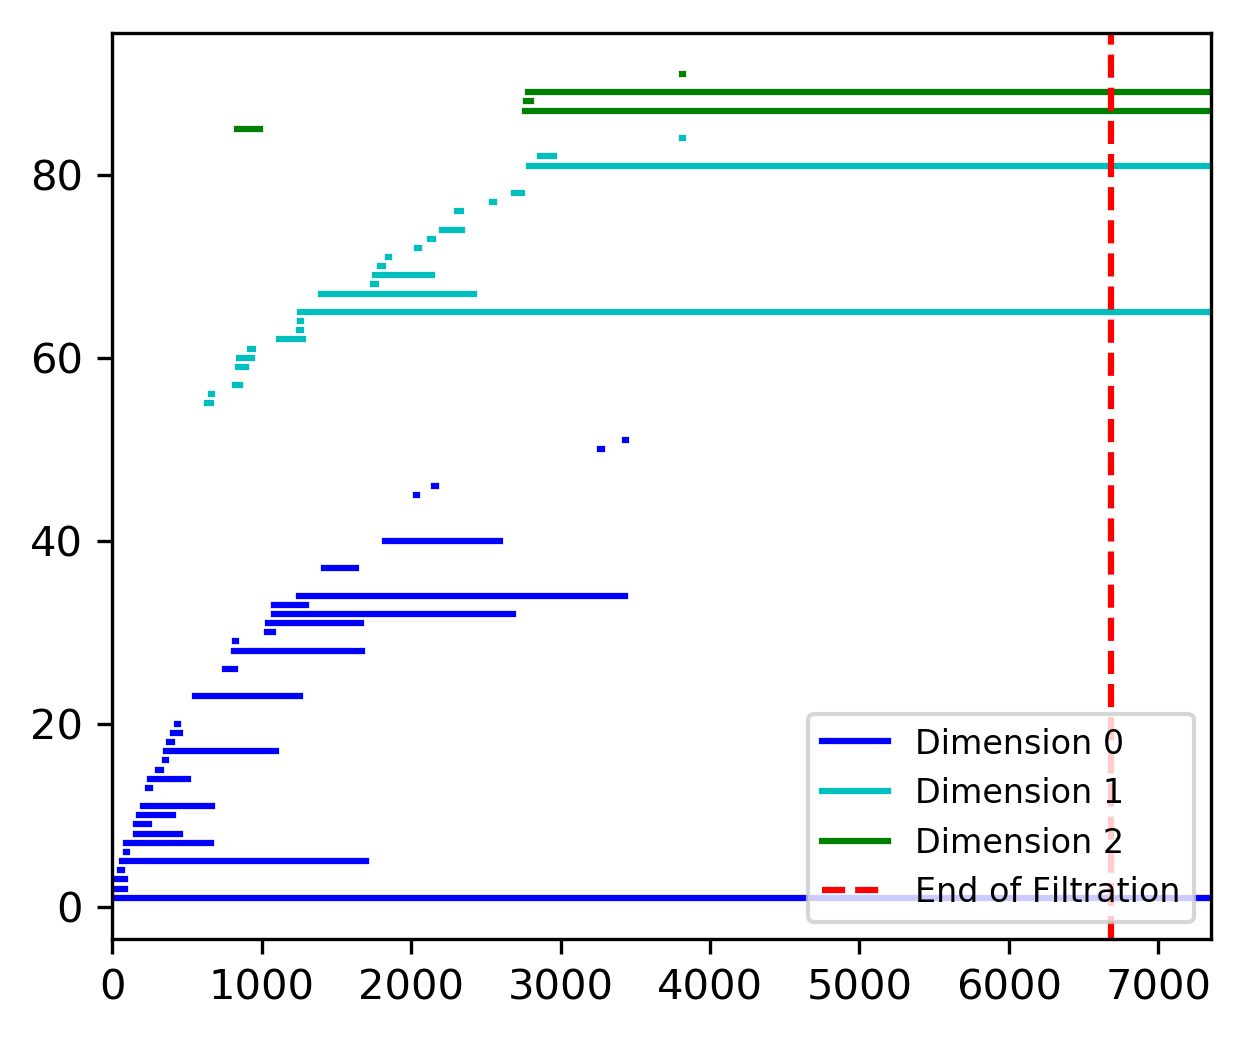

(52, 0.07874478079331942, 1)
(32, 0.04760079592901881, 2)
(7, 0.08663883089770354, 2)
Axler


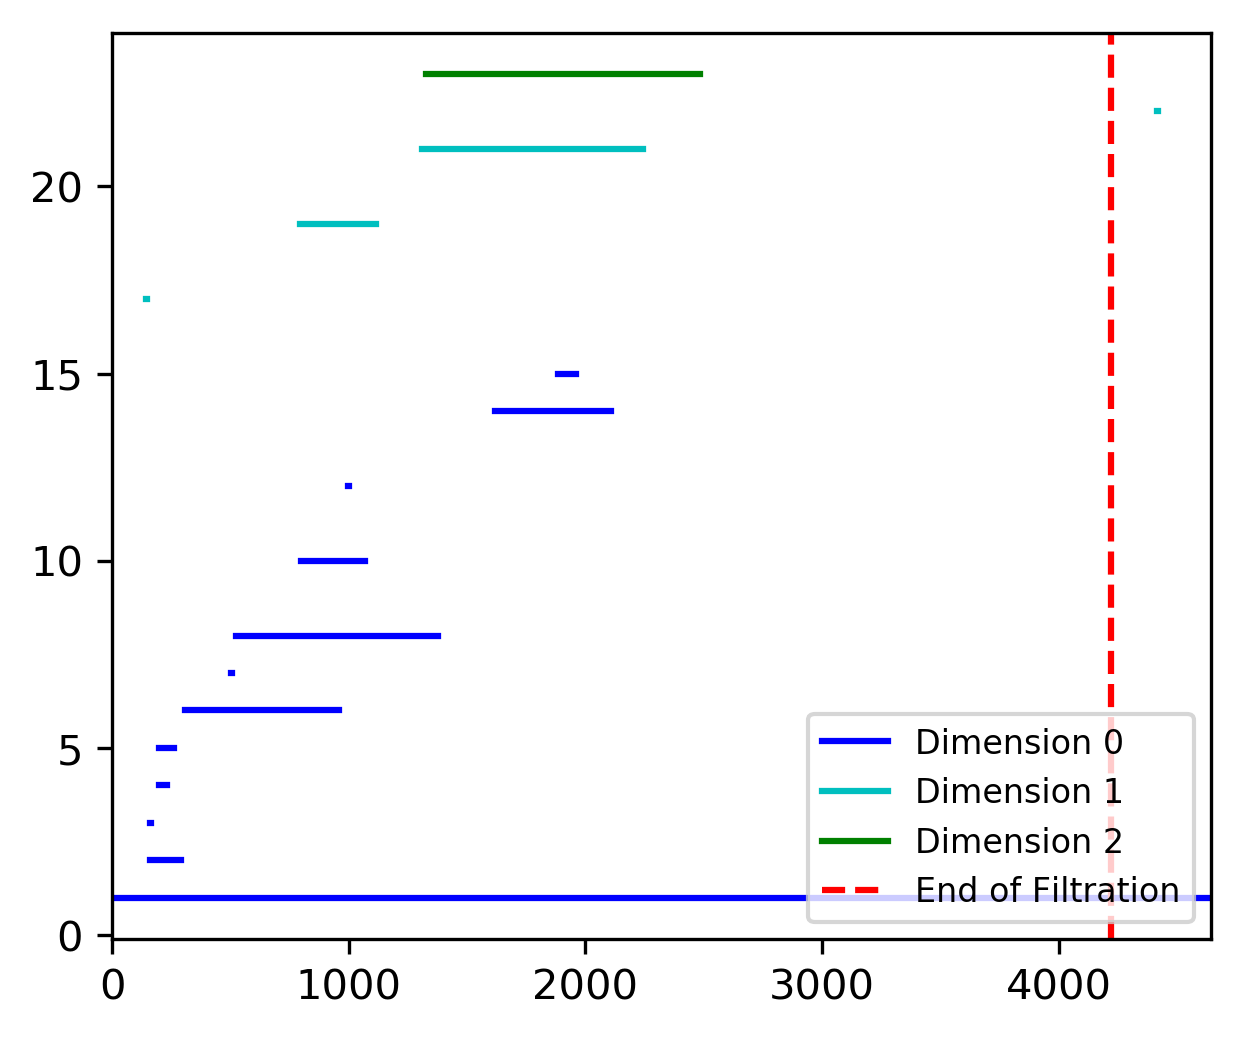

(16, 0.09888689003822802, 1)
(6, 0.04726032531294506, 0)
(1, 0.2604002698448392, 0)
Edwards


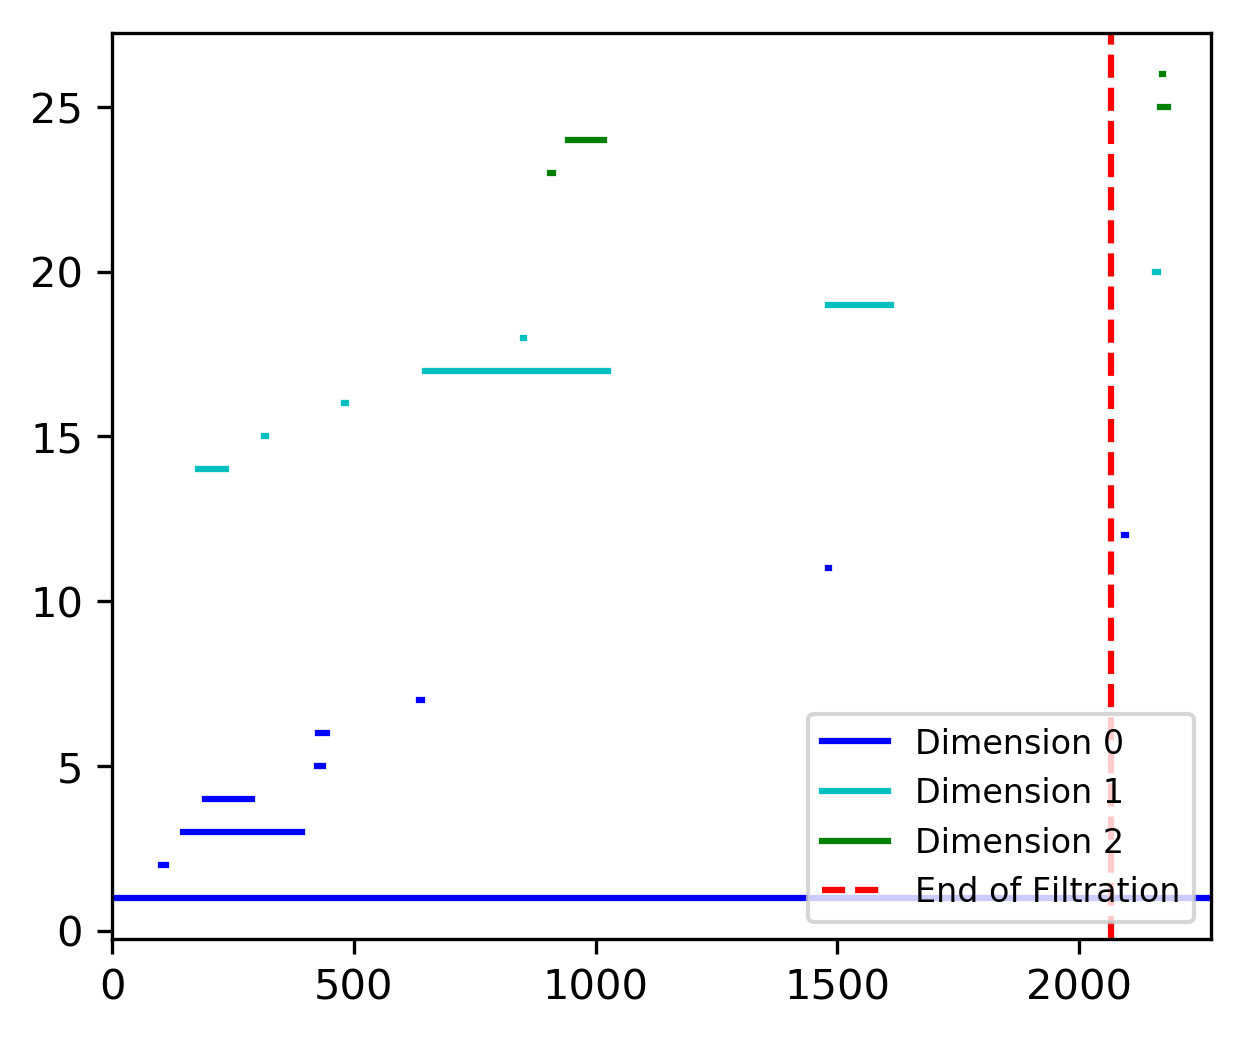

(13, 0.0901213171577123, 1)
(9, 0.028885037550548817, 1)
(4, 0.01061525129982669, 0)
Lang


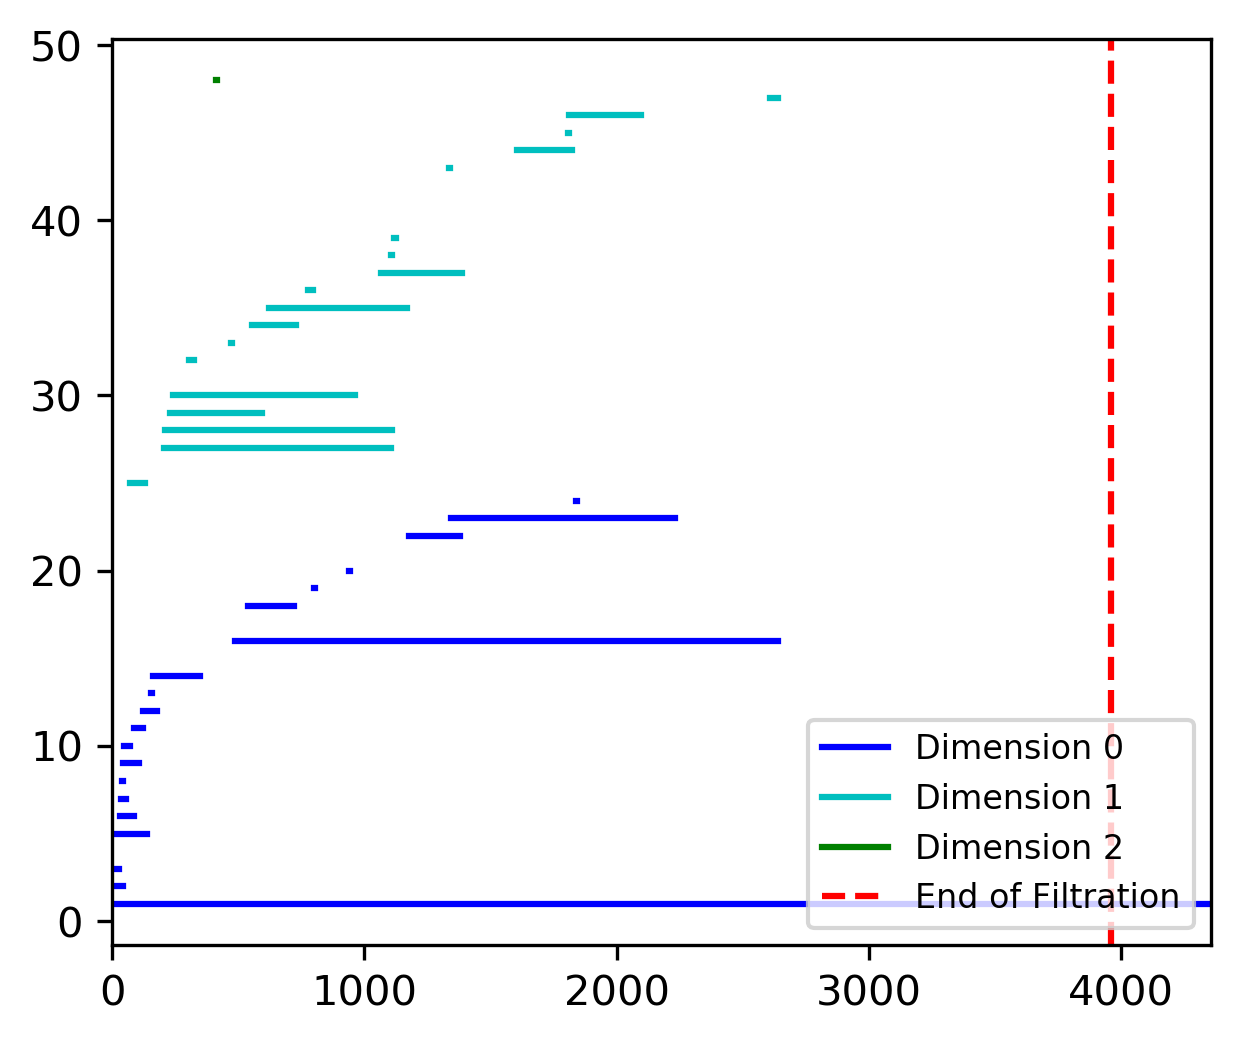

(24, 0.10290655559579863, 1)
(23, 0.07213832417366108, 0)
(1, 0.0007243752263672582, 0)
Petersen


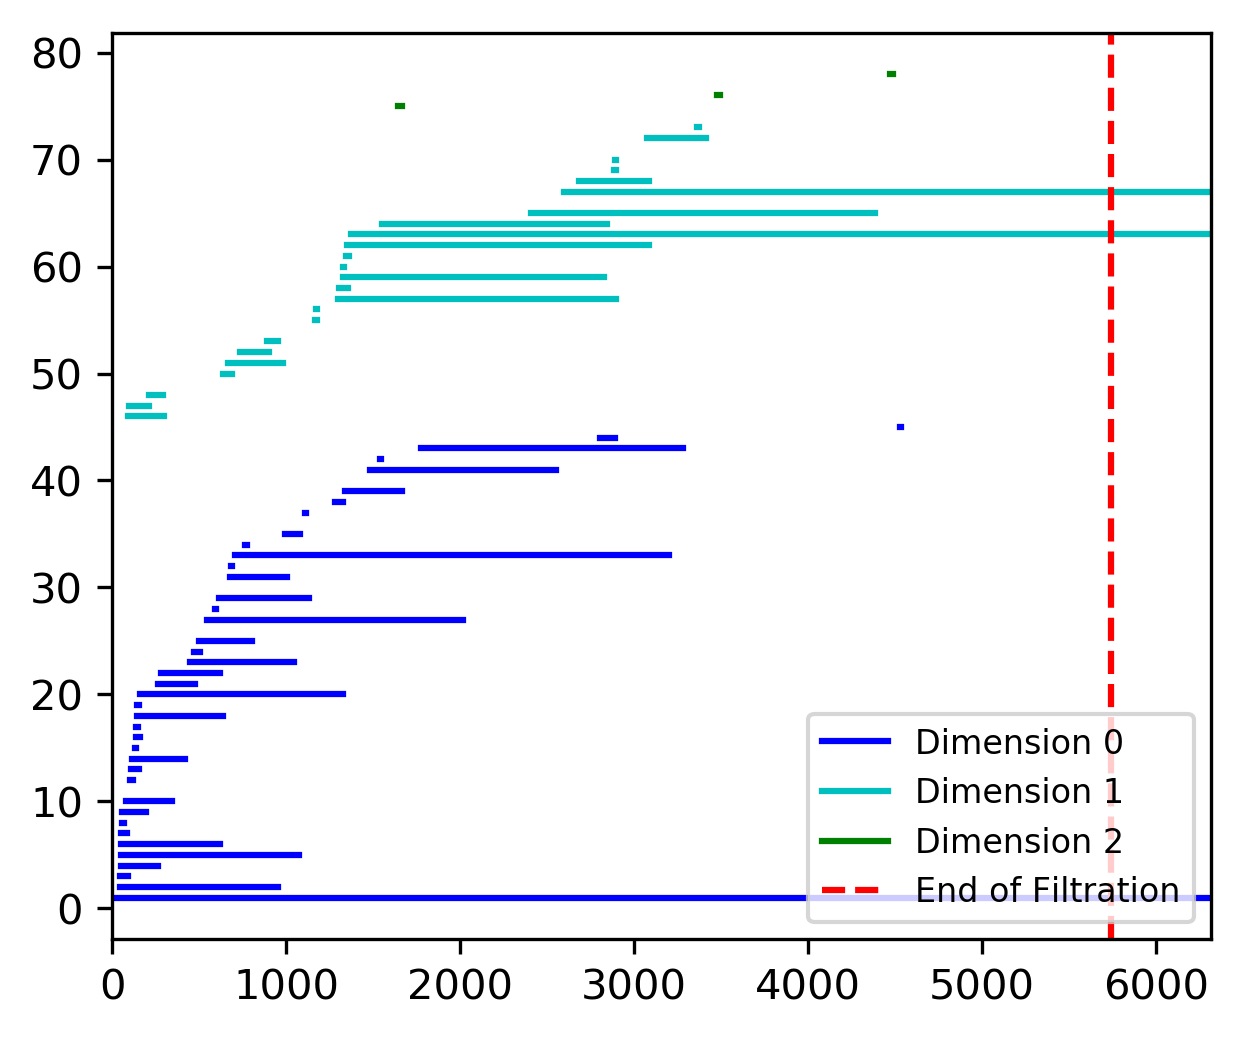

(45, 0.0917685872510899, 1)
(29, 0.11277288185175705, 2)
(4, 0.0033404029692470838, 0)
Robbiano


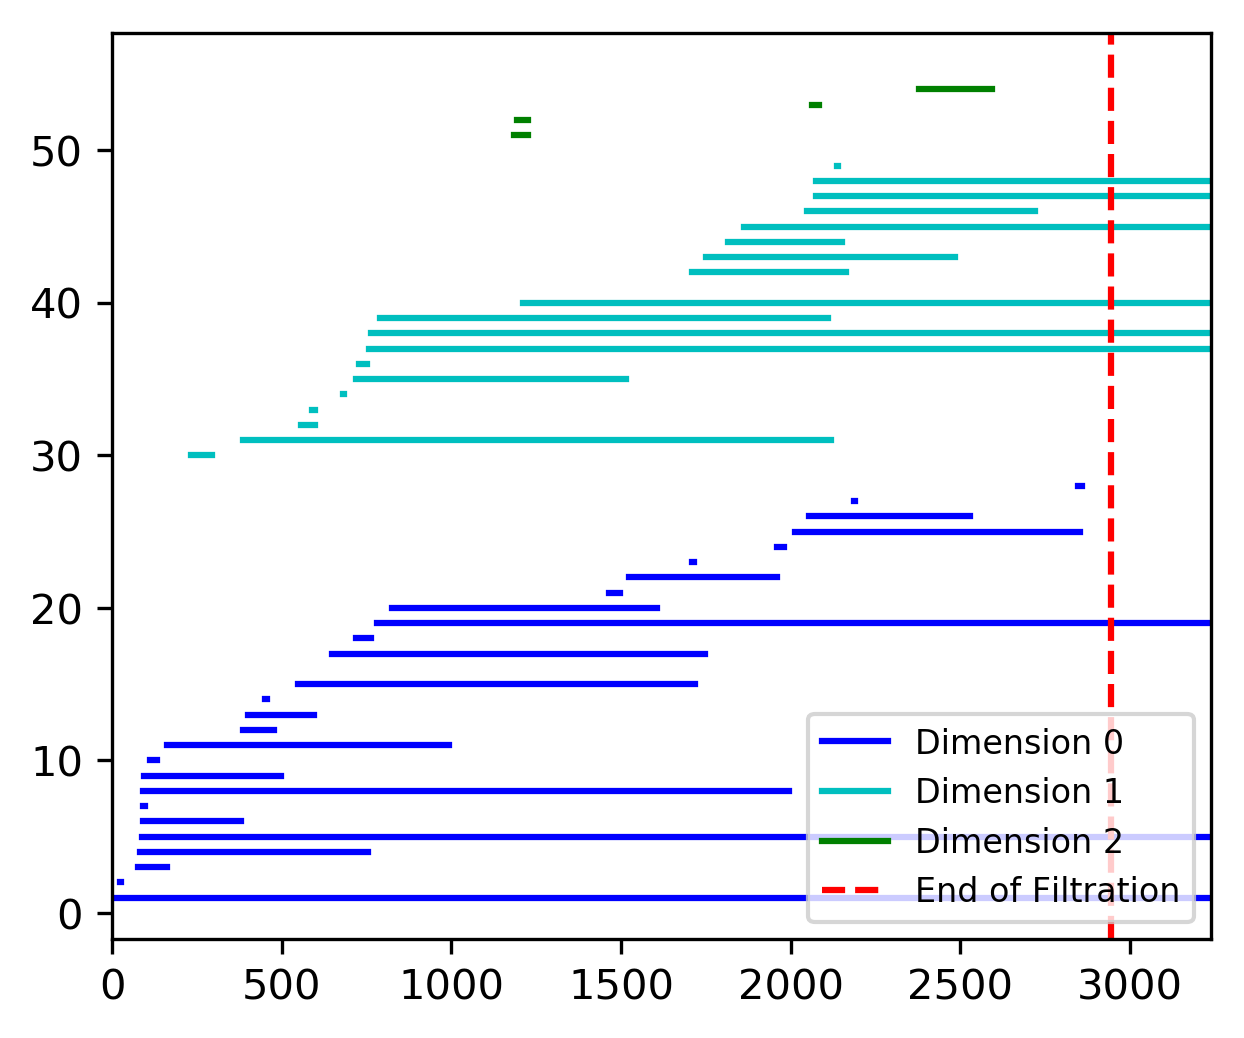

(29, 0.17123282130926093, 2)
(21, 0.25348793047596707, 3)
(5, 0.014449917898193759, 0)
Bretscher


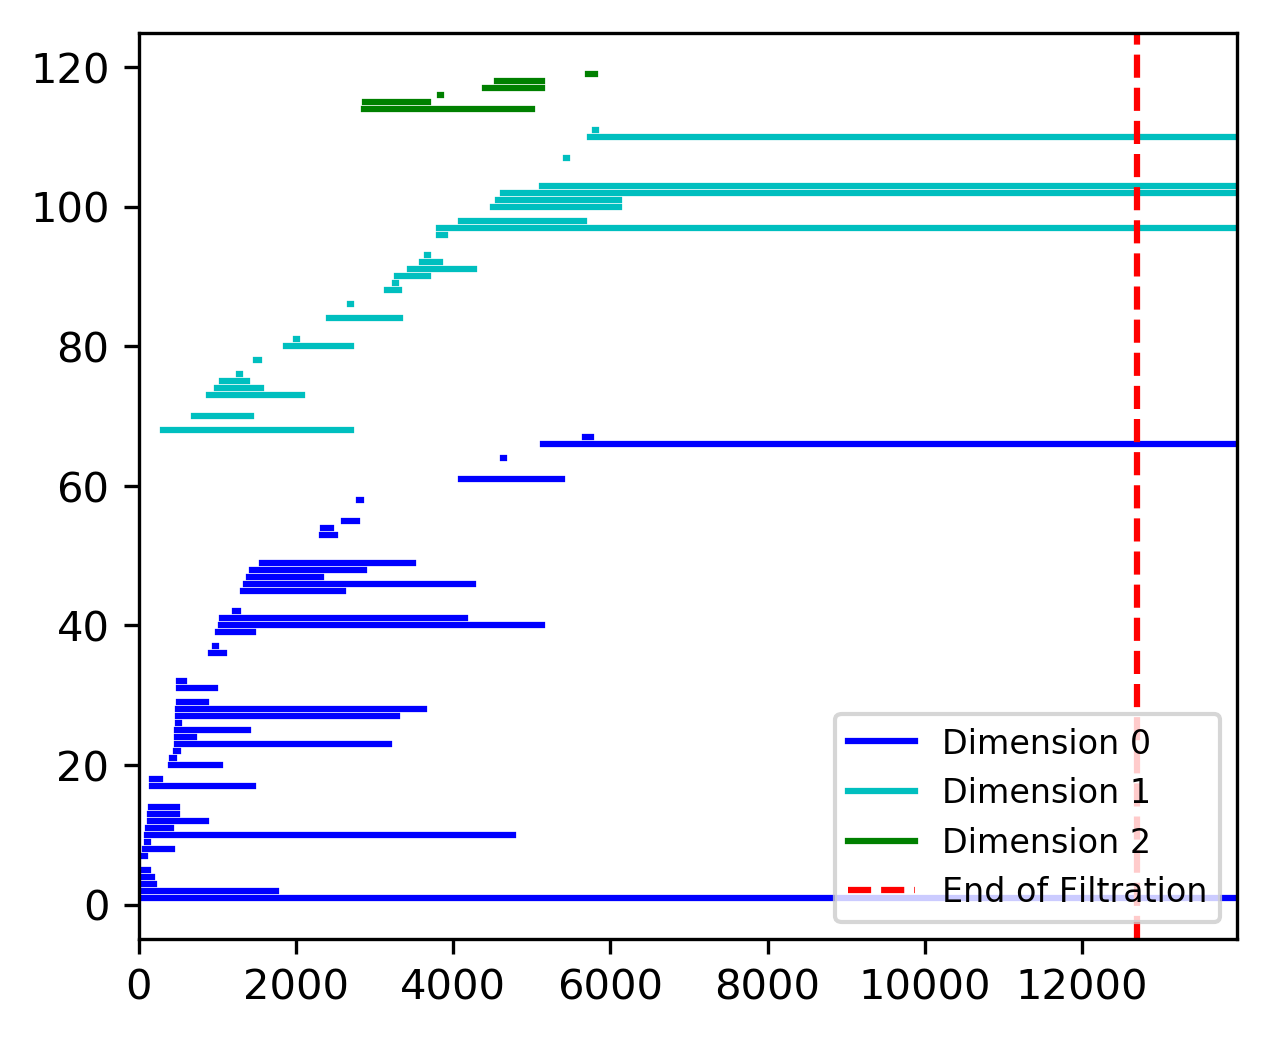

(67, 0.11083419233068337, 2)
(46, 0.06667420783458791, 4)
(6, 0.11413329128560916, 0)
Greub


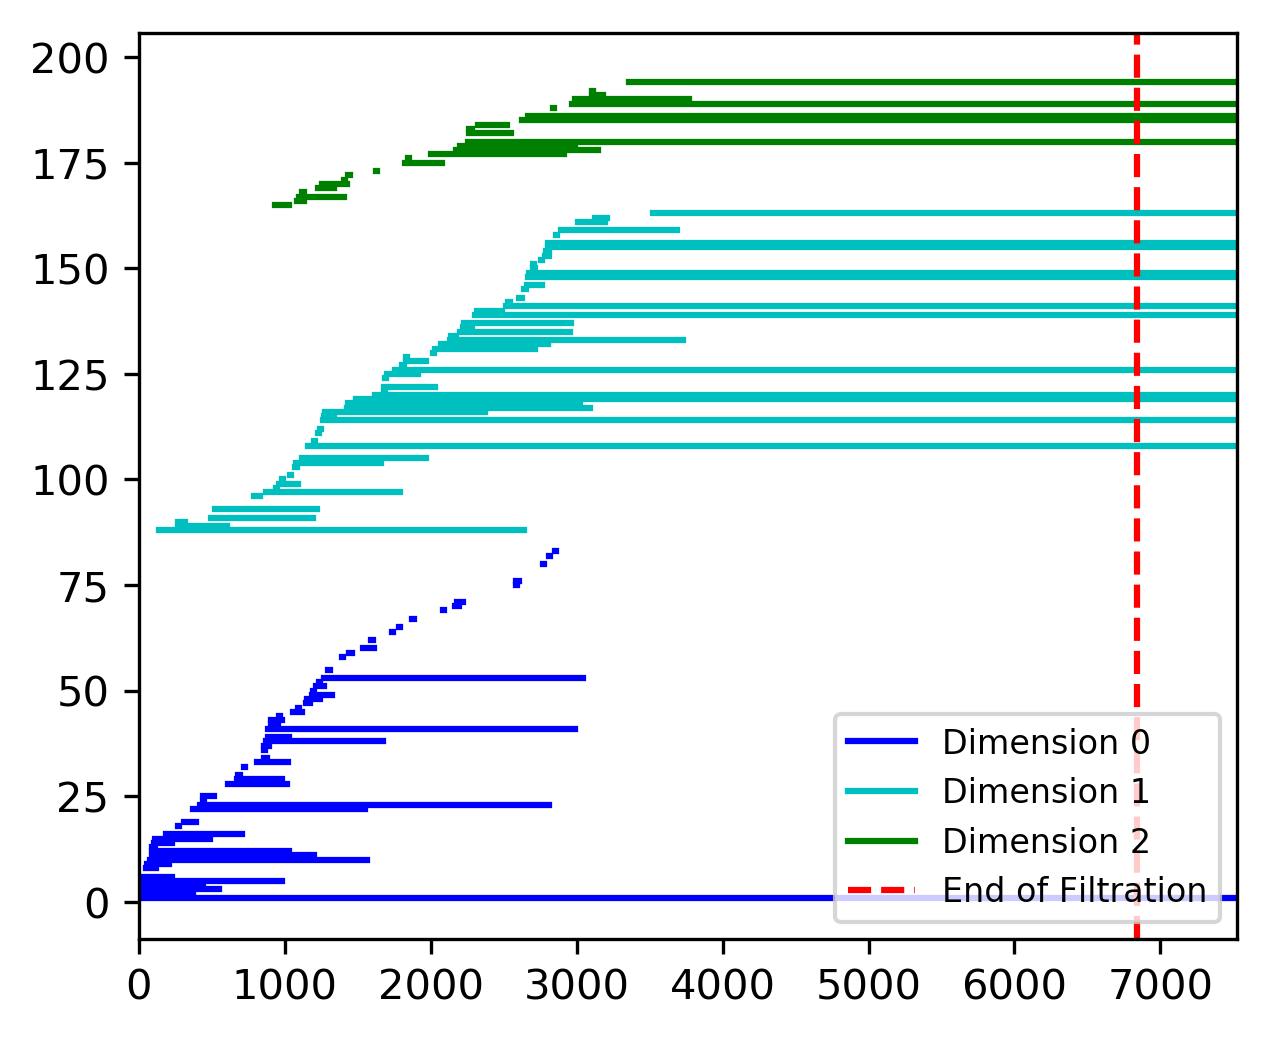

(85, 0.06607587160190444, 1)
(79, 0.12387546683412097, 12)
(32, 0.08447291122715406, 5)
Hefferson


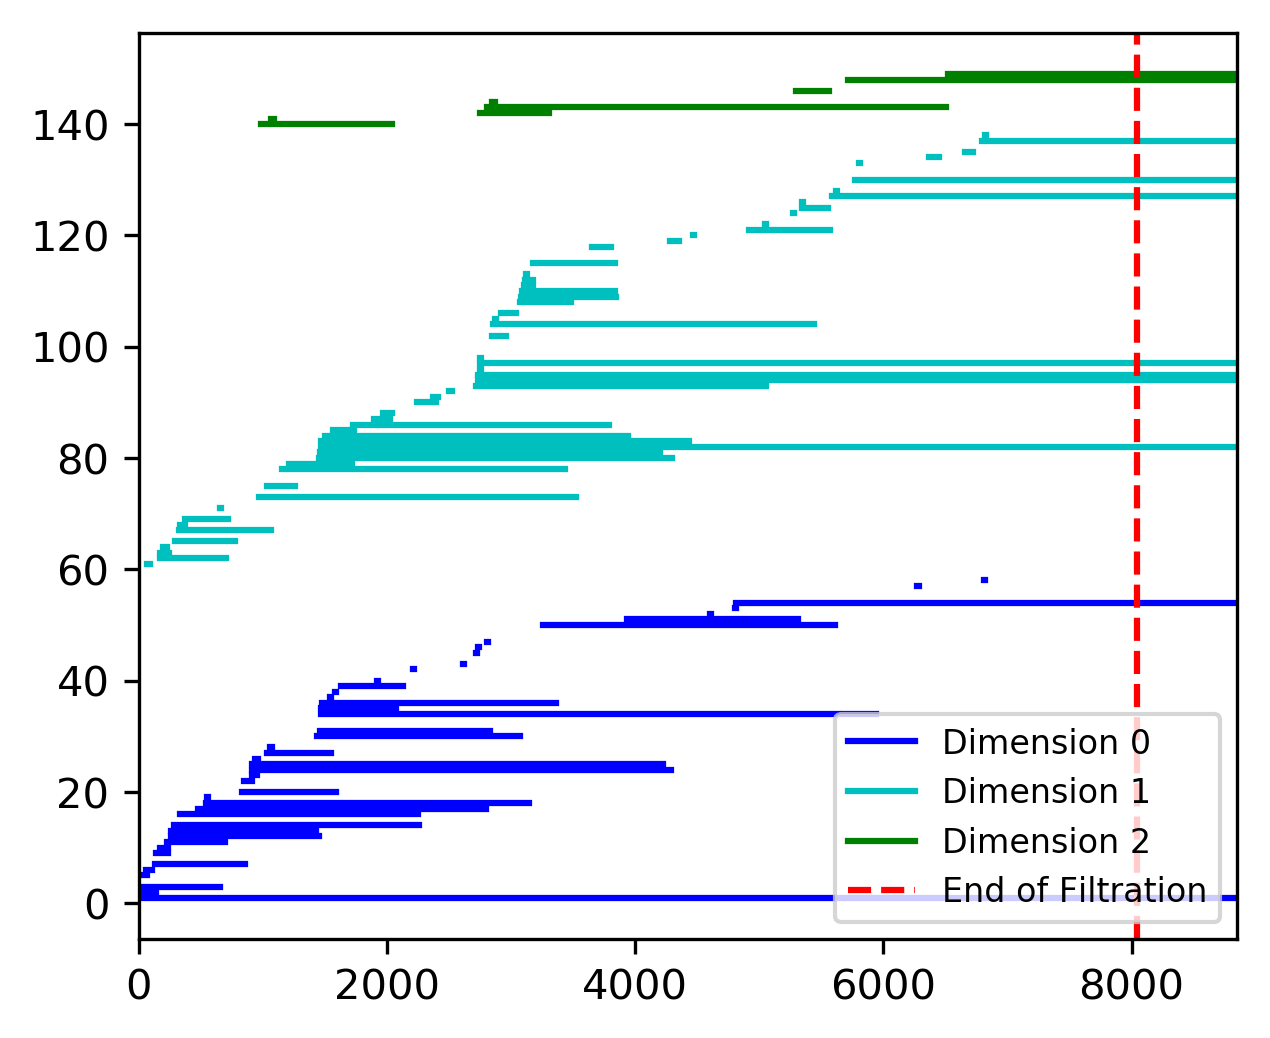

(60, 0.10788662524683333, 2)
(78, 0.09495811706474908, 7)
(11, 0.09511237209546702, 2)
Strang


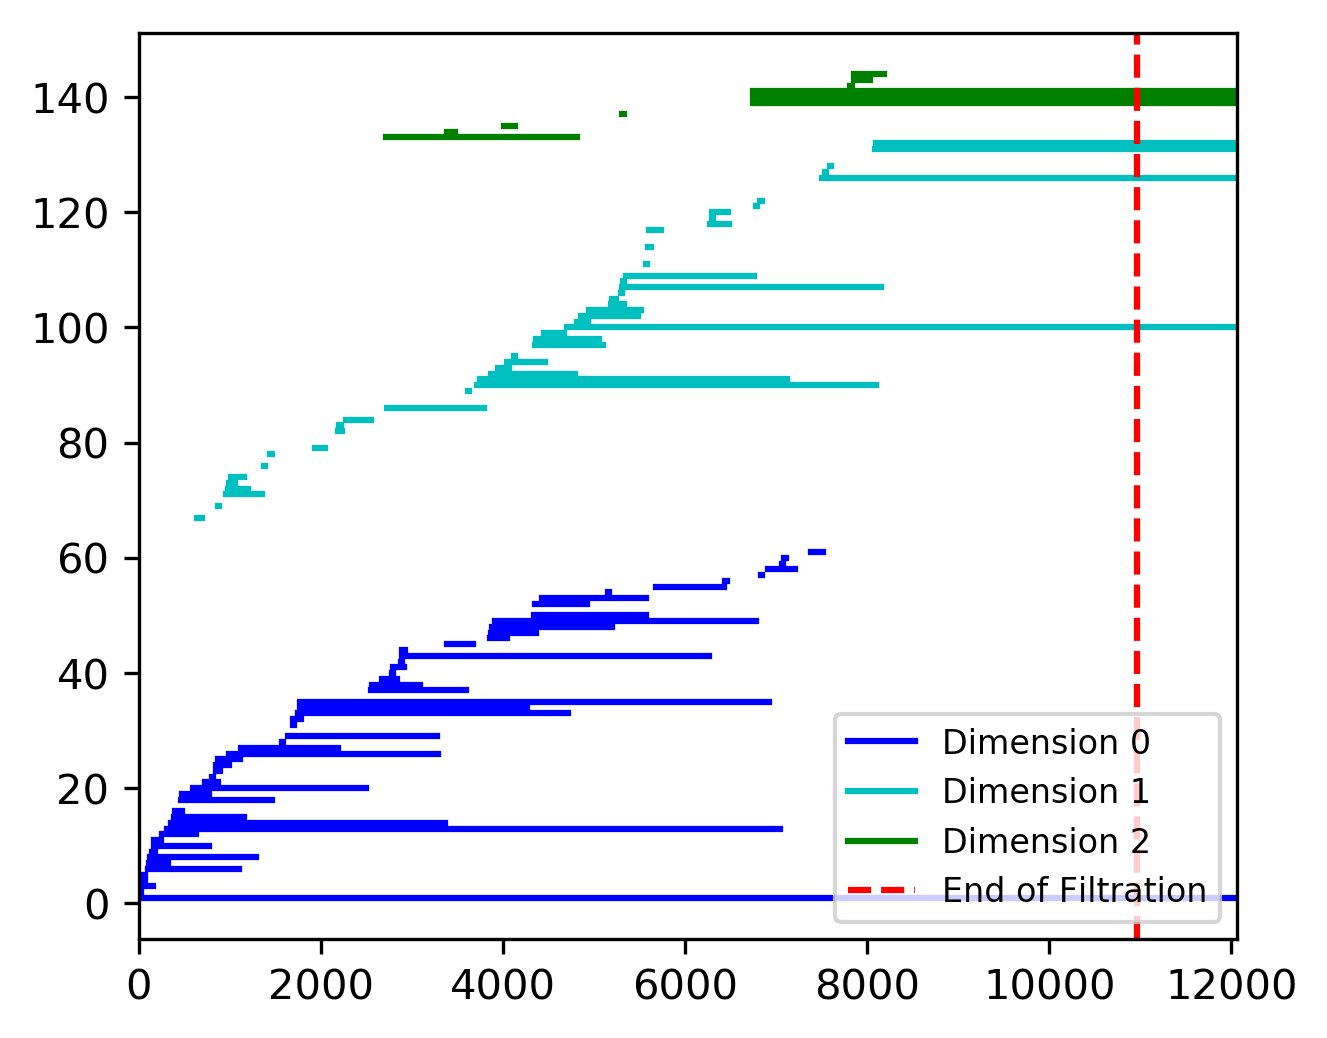

(63, 0.10933047193704931, 1)
(69, 0.042689191336122416, 4)
(12, 0.07359926918392205, 3)


In [134]:
barcodeynesses = []

for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    oaat_mat = CN.oaat_filtration(CN.dist_mat)
    bars = CN.get_barcode(oaat_mat[0])
    CN.plot_barcode(bars, dims=[0, 1, 2])
    barcodeynesses.append([])
    for k in range(len(bars)):
        bc = CN.barcodeyness(bars[k][1], oaat_mat[1])
        print(bc)
        barcodeynesses[i].append(bc)

In [ ]:
bars = CN6.get_barcode(CN6.oaat_filtration(CN6.dist_mat)[0], maxdim=3)

In [57]:
a = CN1.cont_config_graph()

In [58]:
nx_test = nx.from_numpy_array(a)

(array([ 3.,  2.,  3.,  2.,  2.,  5.,  9.,  7.,  6., 14.,  5.,  6.,  9.,
         4.,  4.,  6.,  8.,  4.,  2.,  5.,  0.,  1.,  5.,  4.,  6.,  4.,
         0.,  3.,  3.,  4.,  3.,  3., 10.,  2.,  0.,  1.,  3.,  2.,  1.,
         3.,  1.,  3.,  1.,  1.,  2.,  3.,  1.,  3.,  4.,  1.,  3.,  4.,
         0.,  0.,  2.,  0.,  0.,  1.,  5.,  0.,  0.,  2.,  1.,  0.,  2.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  1.,
         2.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   1.31,   2.62,   3.93,   5.24,   6.55,   7.86,   9.17,
         10.48,  11.79,  13.1 ,  14.41,  15.72,  17.03,  18.34,  19.65,
         20.96,  22.27,  23.58,  24.89,  26.2 ,  27.51,  28.82,  30.13,
         31.44,  32.75,  34.06,  35.37,  36.68,  37.99,  39.3 ,  40.61,
         41.92,  43.23,  44.54,  45.85,  47.16,  48.47,  49.78,  51.09,
         52.4 ,  53.71,  55.02,  56.33,  57.64,  58.95,  60.26,  61.57,
  

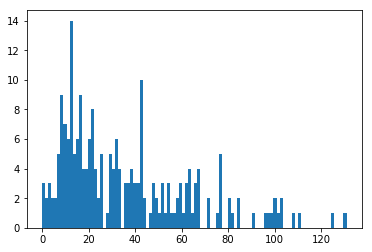

In [59]:
plt.hist(dict(nx_test.degree()).values(), bins=100)

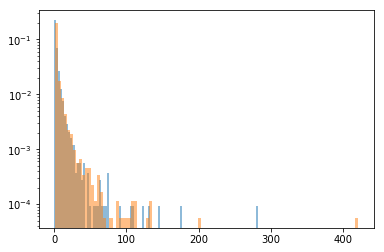

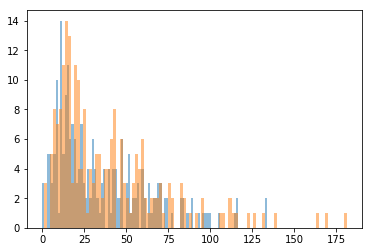

In [67]:
a = CN1.cont_config_graph()
nx_test = nx.from_numpy_array(a)

plt.hist([x[2]['weight'] for x in nx_test.edges(data=True)], bins=100, alpha=0.5, density=True)
plt.hist([x[2]['weight'] for x in CN1.graph.edges(data=True)], bins=100, alpha=0.5, density=True)
plt.yscale('log')
plt.show()
plt.hist(dict(nx_test.degree).values(), bins=100, alpha=0.5)
plt.hist(dict(CN1.graph.degree).values(), bins=100, alpha=0.5)
plt.show()

(array([ 3.,  0.,  5.,  8.,  7.,  8., 11., 14., 13.,  3., 11., 10.,  4.,
         8.,  1.,  4.,  3.,  5.,  5.,  2.,  4.,  4.,  6.,  8.,  0.,  6.,
         3.,  2.,  1.,  3.,  5.,  4.,  6.,  2.,  1.,  2.,  2.,  2.,  3.,
         1.,  0.,  3.,  2.,  0.,  0.,  3.,  2.,  0.,  1.,  0.,  1.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,   2.8,   4.6,   6.4,   8.2,  10. ,  11.8,  13.6,  15.4,
         17.2,  19. ,  20.8,  22.6,  24.4,  26.2,  28. ,  29.8,  31.6,
         33.4,  35.2,  37. ,  38.8,  40.6,  42.4,  44.2,  46. ,  47.8,
         49.6,  51.4,  53.2,  55. ,  56.8,  58.6,  60.4,  62.2,  64. ,
         65.8,  67.6,  69.4,  71.2,  73. ,  74.8,  76.6,  78.4,  80.2,
         82. ,  83.8,  85.6,  87.4,  89.2,  91. ,  92.8,  94.6,  96.4,
        

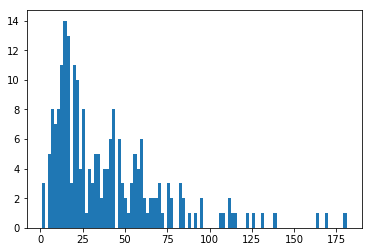

In [50]:
plt.hist(dict(CN1.graph.degree()).values(), bins=100)

In [81]:
print(CN1.oaat_filtration(CN1.dist_mat)[0])

[[1.000e+00 5.000e+00 6.000e+00 ...       inf       inf       inf]
 [5.000e+00 3.000e+00 4.000e+00 ...       inf       inf       inf]
 [6.000e+00 4.000e+00 2.000e+00 ...       inf       inf       inf]
 ...
 [      inf       inf       inf ... 4.343e+03 4.351e+03       inf]
 [      inf       inf       inf ... 4.351e+03 4.350e+03       inf]
 [      inf       inf       inf ...       inf       inf 4.399e+03]]


In [83]:
CN9.first_occs

array([    1,     1,     1,     1,     2,     2,     2,     2,     2,
           6,    10,    10,    13,    20,    20,    22,    23,    25,
          32,    32,    35,    36,    36,    36,    37,    41,    42,
          42,    42,    42,    45,    46,    47,    48,    52,    53,
          53,    58,    63,    64,    65,    66,    66,    71,    71,
          71,    84,    87,    87,    88,    89,    90,    93,    94,
          94,    95,    98,    98,   100,   112,   117,   139,   139,
         141,   145,   145,   148,   150,   150,   151,   153,   155,
         155,   164,   169,   169,   170,   173,   175,   196,   196,
         206,   211,   214,   217,   225,   232,   233,   246,   260,
         291,   296,   300,   303,   304,   310,   315,   317,   318,
         320,   320,   323,   323,   325,   334,   336,   338,   355,
         356,   371,   384,   399,   437,   437,   442,   449,   497,
         502,   503,   509,   512,   512,   522,   525,   527,   528,
         528,   532,

node ordered
[[4.000e+00 9.000e+00 5.000e+00 ...       inf       inf       inf]
 [9.000e+00 7.000e+00 8.000e+00 ...       inf       inf       inf]
 [5.000e+00 8.000e+00 2.000e+00 ...       inf       inf       inf]
 ...
 [      inf       inf       inf ... 8.193e+03       inf       inf]
 [      inf       inf       inf ...       inf 8.198e+03       inf]
 [      inf       inf       inf ...       inf       inf 8.202e+03]]


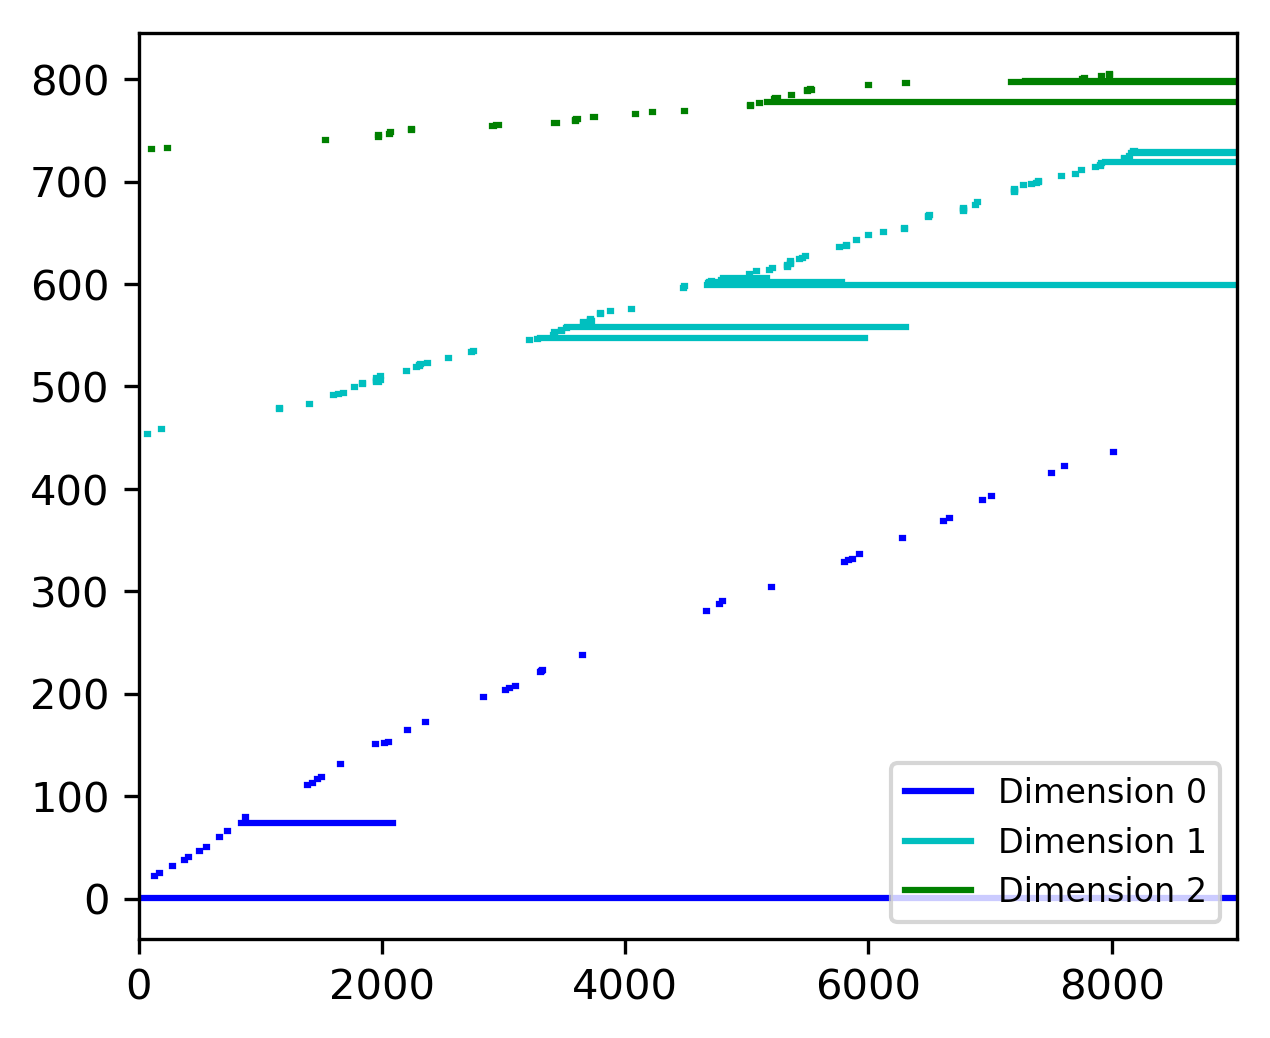

In [82]:
# print('real')
# mat, cutoff = CN9.dist_mat, len(CN9.text)
# bars = CN9.get_barcode(mat, maxdim=2)
# CN9.plot_barcode(bars, dims=[0, 1, 2], length=cutoff)

# print('oaat')
# mat, cutoff, _ = CN9.oaat_filtration(CN9.dist_mat)
# bars = CN9.get_barcode(mat, maxdim=2)
# CN9.plot_barcode(bars, dims=[0, 1, 2], length=cutoff)

# print('random index oaat')

# rnd_ind_mats = CN9.random_index_null()
# mat, cutoff, _ = CN9.oaat_filtration(rnd_ind_mats[1])
# print(mat)
# bars = CN9.get_barcode(mat, maxdim=2)
# CN9.plot_barcode(bars, dims=[0, 1, 2], length=cutoff)

print('node ordered')
mat, cutoff = CN9.node_ordered_filtration()
print(mat)
bars = CN9.get_barcode(mat, maxdim=2)
CN9.plot_barcode(bars, dims=[0, 1, 2], length=cutoff)

# print('random edge')
# mat, cutoff, _ = CN9.rnd_edge_filtration()
# print(mat)
# bars = CN9.get_barcode(mat, maxdim=2)
# CN9.plot_barcode(bars, dims=[0, 1, 2], length=cutoff)

# print('topo dist')
# mat, cutoff = CN9.topo_dist_filtration()
# print(mat)
# bars = CN9.get_barcode(mat, maxdim=2)
# CN9.plot_barcode(bars, dims=[0, 1, 2], length=cutoff)

In [ ]:
CN6.plot_barcode(bars, dims=[1,2,3])

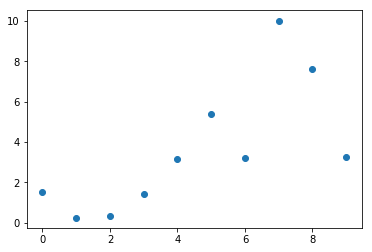

In [69]:
plt.scatter(range(10), [x[1][1] for x in barcodeynesses])

In [135]:
import pandas as pd
import readability
dfs = []

for i in range(10):
    text = globals()['CN{}'.format(i)].text
    text = [list(filter(lambda x: x not in {'VAR', '#', '-pron-'}, s)) 
            for s in text]
    text = [s for s in text if len(s) > 0]
    text = '.\n'.join([' '.join(s) for s in text])
    #print(text[:10000])
    results = readability.getmeasures(text, lang='en')
    #print(*list(results['readability grades'].items()))
    dfs.append(results['readability grades'])
keys = dfs[0].keys()
df = pd.DataFrame(dfs, columns=keys)
names = {k: v for k, v in enumerate(['Wrong', 'Axler', 'Edwards', 'Lang', 'Petersen', 'Robbiano', 
         'Bretscher', 'Greub', 'Hefferson', 'Strang'])}
df.rename(index=names, inplace=True)

In [136]:
df['b0'] = 0.
df['b1'] = 0.
df['b2'] = 0.
df['nb0'] = 0.
df['nb1'] = 0.
df['nb2'] = 0.
df['ni0'] = 0.
df['ni1'] = 0.
df['ni2'] = 0.
df['b0tlen'] = 0.
df['b1tlen'] = 0.
df['b2tlen'] = 0.
df['b0indlen'] = 0.
df['b1indlen'] = 0.
df['b2indlen'] = 0.
df['tlen'] = 0.
df['indlen'] = 0.
for i, (textname, b) in enumerate(zip(texts, barcodeynesses)):
    text = globals()['CN{}'.format(i)].text
    text = [list(filter(lambda x: x not in {'VAR', '#', '-pron-'}, s)) 
            for s in text]
    tlen = sum([len(x) for x in text])
    
    df.at[textname, 'b0'] = b[0][1]
    df.at[textname, 'b1'] = b[1][1]
    df.at[textname, 'b2'] = b[2][1]
    
    df.at[textname, 'nb0'] = b[0][0]
    df.at[textname, 'nb1'] = b[1][0] 
    df.at[textname, 'nb2'] = b[2][0] 
    
    df.at[textname, 'ni0'] = b[0][2]
    df.at[textname, 'ni1'] = b[1][2] 
    df.at[textname, 'ni2'] = b[2][2] 
    
    df.at[textname, 'b0tlen'] = b[0][1] / tlen
    df.at[textname, 'b1tlen'] = b[1][1] / tlen
    df.at[textname, 'b2tlen'] = b[2][1] / tlen
    
    df.at[textname, 'b0indlen'] = b[0][1] / len(globals()['CN{}'.format(i)].index)
    df.at[textname, 'b1indlen'] = b[1][1] / len(globals()['CN{}'.format(i)].index)
    df.at[textname, 'b2indlen'] = b[2][1] / len(globals()['CN{}'.format(i)].index)
    
    df.at[textname, 'btlen'] = b[0][1] / len(globals()['CN{}'.format(i)].text)
    df.at[textname, 'bindlen'] = b[0][1] / len(globals()['CN{}'.format(i)].index)
    df.at[textname, 'tlen'] = tlen
    df.at[textname, 'indlen'] = len(globals()['CN{}'.format(i)].index)

In [130]:
df

,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,b0,...,b0tlen,b1tlen,b2tlen,b0indlen,b1indlen,b2indlen,tlen,indlen,btlen,bindlen
Wrong,6.572750,5.861894,8.481690,68.586215,11.096126,32.610553,10.493840,2.436488,9.100645,0.076978,...,1.168277e-06,8.799974e-07,1.708650e-06,0.000277,0.000209,0.000405,65890.0,278.0,0.000012,0.000277
Axler,8.115965,8.217136,9.268504,65.740426,12.157521,37.235448,11.305302,3.408049,9.240831,0.097690,...,1.470210e-06,1.822383e-06,2.935071e-06,0.000450,0.000558,0.000899,66446.0,217.0,0.000023,0.000450
Edwards,8.869993,9.033218,8.123424,67.550845,13.964636,39.346128,12.436934,3.866873,8.923821,0.085077,...,2.167017e-06,1.088453e-06,4.972600e-07,0.000583,0.000293,0.000134,39260.0,146.0,0.000041,0.000583
Lang,5.321569,4.903392,6.940371,79.023368,10.132835,30.018145,9.936123,2.185468,8.555715,0.106245,...,2.337424e-06,2.077216e-06,0.000000e+00,0.000594,0.000527,0.000000,45454.0,179.0,0.000027,0.000594
Petersen,6.452596,6.080762,8.541160,70.368601,10.838457,31.960973,10.378619,2.403895,9.088314,0.102171,...,1.643125e-06,2.119724e-06,2.450683e-08,0.000419,0.000540,0.000006,62181.0,244.0,0.000018,0.000419
Robbiano,7.928227,8.338969,8.779358,69.284859,12.746230,36.632945,11.687578,3.347261,8.600771,0.169251,...,3.407447e-06,6.001902e-06,4.342432e-07,0.000773,0.001361,0.000098,49671.0,219.0,0.000057,0.000773
Bretscher,6.176079,5.682260,8.300188,71.240732,10.776541,32.912529,10.297661,2.461035,9.153234,0.107397,...,9.131264e-07,7.970762e-07,9.884677e-07,0.000280,0.000244,0.000303,117615.0,384.0,0.000008,0.000280
Greub,6.783326,6.529385,9.042785,68.242474,11.585750,34.122475,10.837160,2.679073,9.621935,0.067826,...,9.369444e-07,2.427419e-06,1.653465e-06,0.000247,0.000639,0.000435,72391.0,275.0,0.000010,0.000247
Hefferson,6.600287,6.916807,8.686304,72.858930,11.184483,33.497253,10.657204,2.735116,8.878631,0.103076,...,9.627698e-07,1.318343e-06,1.345887e-06,0.000258,0.000354,0.000361,107062.0,399.0,0.000013,0.000258
Strang,5.710950,5.804535,7.996907,76.512114,10.639245,32.327951,10.273334,2.483802,8.380186,0.110384,...,8.915774e-07,5.372054e-07,6.885375e-07,0.000244,0.000147,0.000188,123808.0,453.0,0.000010,0.000244


In [80]:
CN0.text

[['chapter', '#', 'basic', 'notions', '#'],
 ['vector',
  'space',
  'a',
  'vector',
  'space',
  'VAR',
  'be',
  'a',
  'collection',
  'of',
  'object',
  'call',
  'vector',
  'denote',
  'in',
  'this',
  'book',
  'by',
  'lowercase',
  'bold',
  'letter',
  'like',
  'VAR',
  'along',
  'with',
  'two',
  'operation',
  'addition',
  'of',
  'vector',
  'and',
  'multiplication',
  'by',
  'a',
  'number',
  'scalar',
  '#',
  'such',
  'that',
  'the',
  'following',
  '#',
  'property',
  'the',
  'so',
  'call',
  'axiom',
  'of',
  'a',
  'vector',
  'space',
  'hold',
  'the',
  'first',
  '#',
  'property',
  'deal',
  'with',
  'the',
  'addition',
  '#'],
 ['commutativity',
  'VAR',
  'VAR',
  'VAR',
  'VAR',
  'for',
  'all',
  'VAR',
  'VAR',
  'VAR',
  '#'],
 ['associativity',
  'VAR',
  'VAR',
  'VAR',
  'VAR',
  'VAR',
  'VAR',
  'for',
  'all',
  'VAR',
  'VAR',
  'VAR',
  'VAR',
  '#'],
 ['zero',
  'vector',
  'there',
  'exist',
  'a',
  'special',
  'vector',
 

In [137]:
import scipy as sp
for x in ['b0', 'b1', 'b2', 'nb0', 'nb1', 'nb2', 'ni0', 'ni1', 'ni2', 'tlen', 'indlen', 'Kincaid', 'SMOGIndex']:
# for x in ['tlen', 'indlen']:
    for y in ['b0', 'b1', 'b2', 'nb0', 'nb1', 'nb2', 'ni0', 'ni1', 'ni2', 'tlen', 'indlen', 'Kincaid']:
        print(x, y, sp.stats.linregress(df[x], df[y])[3])

b0 b0 4.375000000000076e-80
b0 b1 0.031925714474932386
b0 b2 0.6239513528443685
b0 nb0 0.3937558642992326
b0 nb1 0.5570641699526477
b0 nb2 0.25197359967234323
b0 ni0 0.033594155667823804
b0 ni1 0.49911722879291165
b0 ni2 0.1836214696572008
b0 tlen 0.991241509987685
b0 indlen 0.9176690333953195
b0 Kincaid 0.677350430286245
b1 b0 0.031925714474932386
b1 b1 4.375000000000076e-80
b1 b2 0.35638632619287963
b1 nb0 0.8890175179079085
b1 nb1 0.9161364541317968
b1 nb2 0.6749857528837908
b1 ni0 0.12503254359903992
b1 ni1 0.4520145123580014
b1 ni2 0.9243815340751258
b1 tlen 0.5165440121701534
b1 indlen 0.7051284968124565
b1 Kincaid 0.6923631101548768
b2 b0 0.6239513528443685
b2 b1 0.35638632619287963
b2 b2 4.375000000000076e-80
b2 nb0 0.8955401032376648
b2 nb1 0.9860425253200886
b2 nb2 0.9514365012134332
b2 ni0 0.9958191895214235
b2 ni1 0.947251936736174
b2 ni2 0.7984820031537203
b2 tlen 0.32305432313894344
b2 indlen 0.5096113089926138
b2 Kincaid 0.6030897213280667
nb0 b0 0.3937558642992326
nb0 b

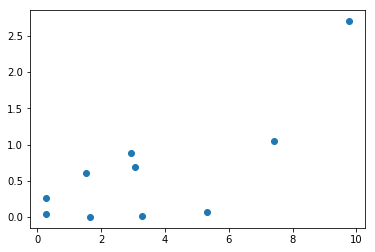

In [110]:
plt.scatter(df['b1'], df['b2'])

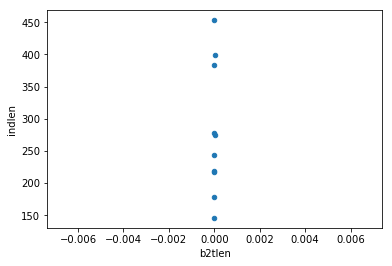

In [84]:
df.plot('b2tlen', 'indlen', 'scatter')

In [3]:
random_ind_net_specs = []

n_samples = 100

for i in range(10):
    print(texts[i])
    CN = globals()['CN{}'.format(i)]
    
    r_ind_nets = []
    for _ in range(n_samples):
        ti, fo, cut, r_ind = CN.random_index_null(return_otherstuff=True)
        r_ind_nets.append((ti, fo, cut, r_ind))
    random_ind_net_specs.append(r_ind_nets)
    
import pickle
pickle.dump(random_ind_net_specs, open('random_index_networks.p', 'wb'))

Wrong
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Axler
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Edwards
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Lang
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Petersen
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Robbiano
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Bretscher
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Greub
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Hefferson
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Strang
Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0



Yield percent: 1.0


In [2]:
import pickle
x = pickle.load(open('random_index_networks.p', 'rb'))

In [5]:
from ripser import ripser
t9, _, _ = CN9.node_ordered_filtration(only_prev=False)

In [55]:
nx.from_numpy_array(CN0.cooc_mat,parallel_edges=False)

In [78]:
nx.to_numpy_array(CN0.graph)

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 4., ..., 0., 0., 0.],
       [1., 4., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 3., 5.],
       [0., 0., 0., ..., 3., 0., 3.],
       [0., 0., 0., ..., 5., 3., 0.]])

In [80]:
CN0.index_labels

array(['basic notions', 'multiplication', 'axiom', 'denote',
       'vector space', 'scalar', 'vector', 'additive inverse', 'inverse',
       'manipulation', 'real number', 'real vector space',
       'complex number', 'complex vector space', 'complex space',
       'arbitrary field', 'arbitrary', 'complex case', 'matrix',
       'real entry', 'polynomial', 'coefficient', 'variable',
       'row number', 'column number', 'transpose', 'vice versa',
       'linear transformation', 'linear', 'adjoint', 'transformation',
       'column vector', 'linear combination', 'unique representation',
       'unique solution', 'standard basis', 'decomposition',
       'linearly independent system', 'linearly independent',
       'complete system', 'column space', 'uniqueness', 'trivial',
       'trivial linear combination', 'trivial solution',
       'linearly dependent', 'exercises', 'matrixvector multiplication',
       'mapping', 'domain', 'target space', 'rotation', 'coordinate rule',
       'com

In [110]:
CN0.topo_dist_filtration()

array([[   0.,   78., 1503., ...,   inf,   inf,   inf],
       [  78.,    0., 1496., ...,   inf,   inf,   inf],
       [1503., 1496.,    0., ...,   inf,   inf,   inf],
       ...,
       [  inf,   inf,   inf, ...,    0., 3162., 3196.],
       [  inf,   inf,   inf, ..., 3162.,    0., 3199.],
       [  inf,   inf,   inf, ..., 3196., 3199.,    0.]])

In [84]:
c = 1/nx.to_numpy_array(CN0.graph)
c[c == np.inf] = 0
c = nx.from_numpy_array(c)
sorted(set(nx.shortest_path_length(c, source=0, weight='weight').values()))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


[0,
 0.5,
 0.5078740157480315,
 0.5106382978723404,
 0.5123456790123457,
 0.515748031496063,
 0.5166666666666667,
 0.5178571428571429,
 0.519437877593906,
 0.5212765957446809,
 0.5217629046369203,
 0.5235816340685255,
 0.5268384326355341,
 0.5284747112704102,
 0.5290123456790125,
 0.5305274971941639,
 0.5331790123456791,
 0.5336222747570266,
 0.537037037037037,
 0.5373456790123458,
 0.5391240157480315,
 0.5409171075837743,
 0.5434782608695652,
 0.5435956790123457,
 0.5438281214963451,
 0.5454545454545454,
 0.5456790123456791,
 0.5468284376330353,
 0.5473426357987121,
 0.5476190476190477,
 0.5480599647266314,
 0.5480825544076652,
 0.5493827160493827,
 0.5495406824146981,
 0.550687877593906,
 0.5508072174738842,
 0.5526315789473684,
 0.5540123456790124,
 0.5546533713200381,
 0.5551521633081917,
 0.5554930633670792,
 0.5555555555555556,
 0.5575406824146981,
 0.5578002244668911,
 0.5578740157480315,
 0.5618080446037436,
 0.5623456790123458,
 0.5625,
 0.5649772579597141,
 0.5679012345679013

In [26]:
nx.goldberg_radzik(CN9.graph, source='gauss', weight=lambda u, v, d: d['weight'])



({'gauss': None,
  'elimination': 'dimensional',
  'gaussian elimination': 'subtract',
  'matrices': 'subtract',
  'linear': 'elimination step',
  'equation': 'upper triangular',
  'algebra': 'dimensional',
  'linear equation': 'dimensional',
  'linear algebra': 'dimensional',
  'determinant': 'gauss',
  'subtract': 'gauss',
  'second equation': 'nullspace',
  'multiply': 'substitution',
  'substitution': 'gauss',
  'compute': 'substitution',
  'scientific computing': 'linear',
  'algorithm': 'gauss',
  'matrix': 'singular case',
  'left side': 'singular case',
  'vector': 'gauss',
  'simplify': 'nullspace',
  'multiplication': 'dimensional space',
  'geometry': 'dimensional',
  'dimensional': 'gauss',
  'dimensional space': 'gauss',
  'dimension': 'gauss',
  'intersect': 'gauss',
  'singular case': 'gauss',
  'factorization': 'singular case',
  'triangular': 'gauss',
  'triangular matrix': 'subtract',
  'upper triangular': 'gauss',
  'transpose': 'verify',
  'cramer rule': 'linear',
 

In [114]:
b = ripser(t9, distance_matrix=True, maxdim=2)['dgms']

In [126]:
b = ripser(CN0.oaat_filtration(CN0.dist_mat)[0], distance_matrix=True, maxdim=2)['dgms']

In [113]:
b

[array([[0.000e+00, 1.000e+00],
        [0.000e+00, 2.000e+00],
        [0.000e+00, 4.000e+00],
        [0.000e+00, 7.000e+00],
        [0.000e+00, 1.100e+01],
        [0.000e+00, 1.300e+01],
        [0.000e+00, 1.900e+01],
        [0.000e+00, 2.600e+01],
        [0.000e+00, 3.300e+01],
        [0.000e+00, 4.000e+01],
        [0.000e+00, 4.500e+01],
        [0.000e+00, 5.300e+01],
        [0.000e+00, 6.100e+01],
        [0.000e+00, 6.900e+01],
        [0.000e+00, 7.900e+01],
        [0.000e+00, 9.000e+01],
        [0.000e+00, 1.000e+02],
        [0.000e+00, 1.100e+02],
        [0.000e+00, 1.180e+02],
        [0.000e+00, 1.350e+02],
        [0.000e+00, 1.440e+02],
        [0.000e+00, 1.560e+02],
        [0.000e+00, 1.720e+02],
        [0.000e+00, 1.820e+02],
        [0.000e+00, 1.930e+02],
        [0.000e+00, 2.000e+02],
        [0.000e+00, 2.140e+02],
        [0.000e+00, 2.290e+02],
        [0.000e+00, 2.400e+02],
        [0.000e+00, 2.500e+02],
        [0.000e+00, 2.620e+02],
        

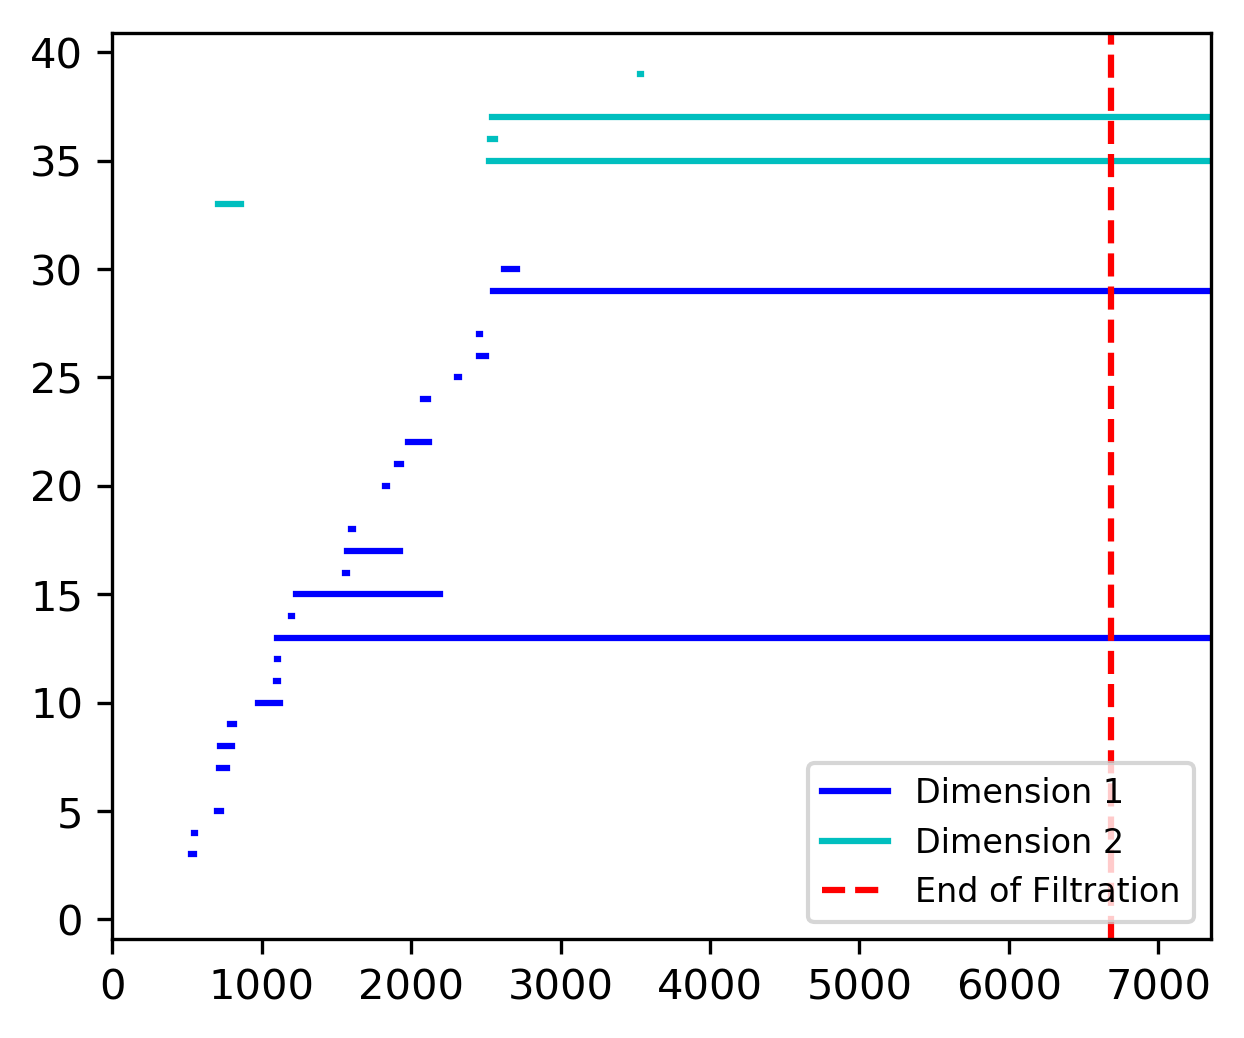

In [127]:
CN0.plot_barcode(list(zip(range(3), b)), dims=[1, 2])

In [1]:
len(CN1.index_labels)

NameError: name 'CN1' is not defined

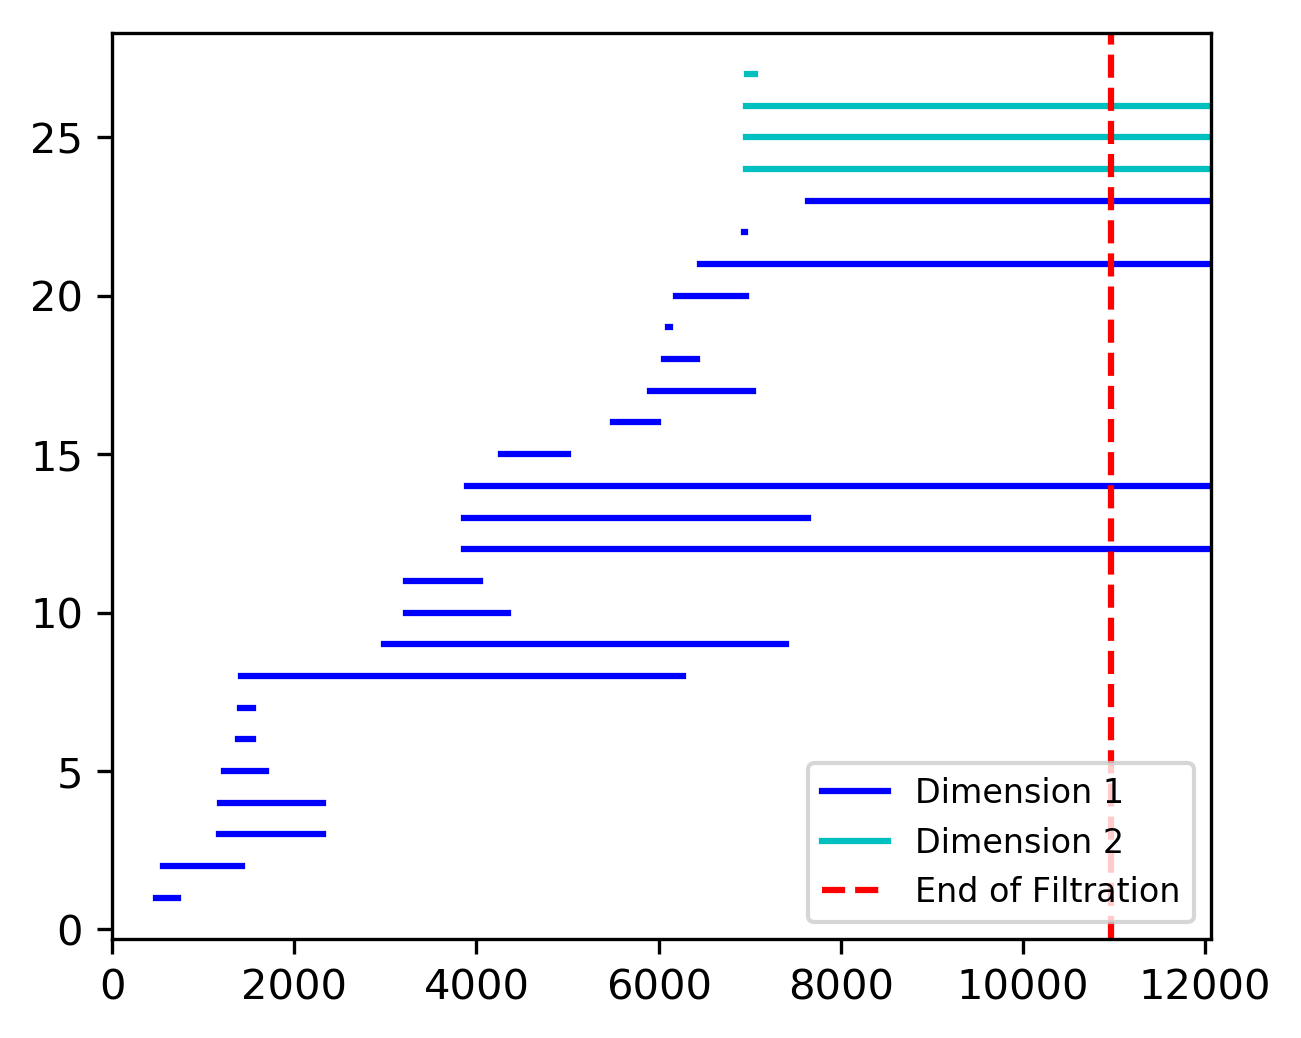

In [25]:
CN9.plot_barcode(list(zip(range(3), b)), dims=[1, 2])

In [ ]:
from collections import Counter

x = CN1.dist_mat[np.triu_indices(len(CN1.dist_mat), k=1)]
x = x[x != np.inf]
Counter(x)[2]

In [162]:
import dionysus as d
from scipy.spatial.distance import squareform
oaat_mat, cutoff, rt = CN1.oaat_filtration(CN1.dist_mat)
dio_dists = oaat_mat
np.fill_diagonal(dio_dists, 0)
sq_dist = squareform(dio_dists)
f = d.fill_rips(sq_dist, 3, cutoff)
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)

In [169]:
len(CN1.text)

4220

In [163]:
d_bars = []
for i, dgm in enumerate(dgms[0:3]):
    d_bars.append((i, np.array(list(map(lambda x: (x.birth, x.death), dgms[i])))))

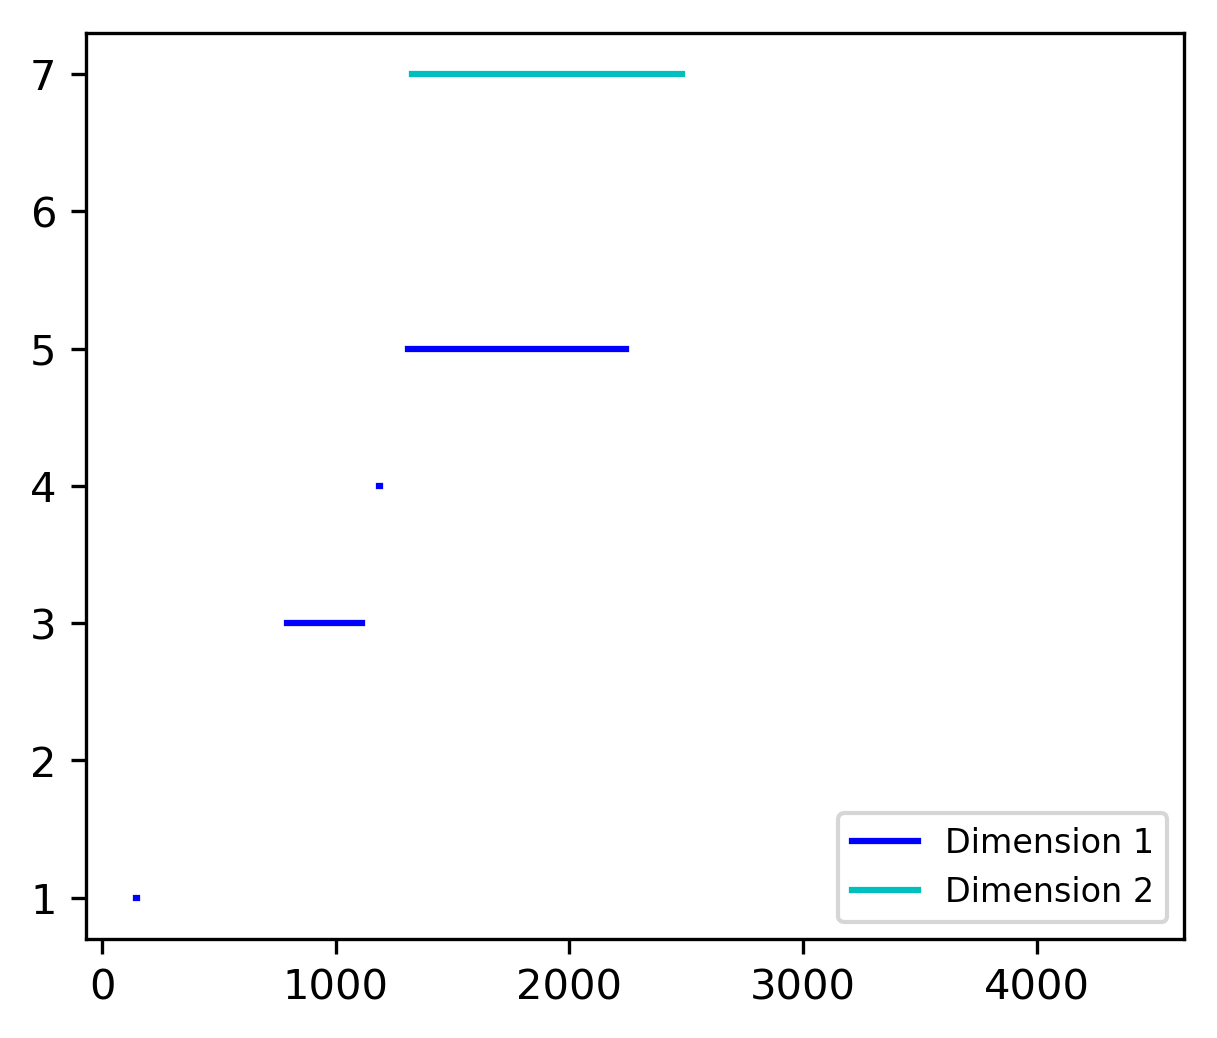

In [167]:
CN1.plot_barcode(d_bars, length=cutoff)

In [142]:
deaths = []
for i in range(len(dgms[1])):
    if dgms[1][i].death - dgms[1][i].birth > 20:
        print(dgms[1][i].data, dgms[1][i].birth, dgms[1][i].death)
        deaths.append(dgms[1][i].death)

10739 695.0 963.0
25087 1268.0 2022.0


In [158]:
c = m[990][1]
f[c.index]

<14,15,17> 11

In [160]:
# gives a list of k-cycles and their times of death
def k_cycles(k, f, m, labels):
    k_cycles = [(f[i].data, rt[int(f[i].data)], ' + '.join('<->'.join(labels[f[x.index][i]] 
                                                  for i in range(len(f[x.index]))) + ', ' + str(f[x.index].data) 
                                       for x in c))
          for _, (i, c) in zip(range(len(m)), 
                               filter(lambda c: len(c[1]) > k+2 and len(f[c[1][0].index]) == k+1, enumerate(m)))]
    return k_cycles

In [161]:
print(*[x for x in k_cycles(1, f, m, CN1.index_labels) 
        if x[0] in deaths], sep='\n\n')

(963.0, ('scalar multiple', 'linear map'), 'vector space<->vector, 2.0 + vector space<->write uniquely, 438.0 + write uniquely<->direction suppose, 443.0 + vector<->null, 661.0 + direction suppose<->null, 695.0')

(2022.0, ('nonzero', 'complex number'), 'vector space<->generalization, 2.0 + vector space<->linear map, 3.0 + generalization<->inner product, 104.0 + linear map<->inner product, 1268.0')


(array([837.,   4.,   2.,   4.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  2. ,  60.2, 118.4, 176.6, 234.8, 293. , 351.2, 409.4, 467.6,
        525.8, 584. ]),
 <a list of 10 Patch objects>)

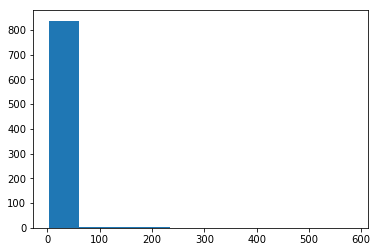

In [68]:
from collections import Counter

plt.hist(Counter(CN1.dist_mat.reshape(-1)[CN1.dist_mat.reshape(-1) != np.inf]).values())


In [30]:
print(*list(map(' '.join, CN1.text)), sep='\n\n')

chapter # VAR descarte explain -pron- work to queen christina of sweden

vector space be a generalization of the description of a plane use two coordinate as publish by descartes in #

vector spaces linear algebra be the study of linear map on finite dimensional vector space

eventually -pron- will learn what all these term mean

in this chapter -pron- will define vector space and discuss -pron- elementary property

in linear algebra well theorem and more insight emerge if complex number be investigate along with real number

thus -pron- will begin by introduce the complex number and -pron- basic property

-pron- will generalize the example of a plane and ordinary space to VAR and VAR which -pron- then will generalize to the notion of a vector space

the elementary property of a vector space will already seem familiar to -pron-

then -pron- next topic will be subspace which play a role for vector space analogous to the role play by subset for set

finally -pron- will look at sum of sub

# suppose VAR be a complex vector space VAR # and the matrix of VAR with respect to some basis of VAR contain only real entry

show that if VAR be an eigenvalue of VAR then so be

# give an example of an operator VAR # # such that VAR have no real eigenvalue

# show that the operator VAR # # define by VAR # # VAR # # # have no eigenvalue

# suppose VAR be a positive integer and VAR # be define by VAR # VAR VAR # VAR VAR VAR # VAR VAR VAR in other word VAR be the operator whose matrix with respect to the standard basis consist of all #

find all eigenvalue and eigenvector of # find all eigenvalue and eigenvector of the backward shift operator VAR # # define by VAR # # # VAR # # # suppose VAR # be invertible

a VAR suppose # VAR with #

prove that be an eigenvalue of VAR if and only if # be an eigenvalue of VAR #

prove that VAR and VAR # have the same eigenvector

section # invariant subspaces # VAR # # suppose VAR # and there exist nonzero vector VAR and VAR in VAR such that VAR VAR VA

VAR VAR # VAR # VAR the operator on the right side of the equation above all commute so -pron- can move the factor -pron- to be the last term in the expression on the right

because VAR VAR VAR # -pron- conclude that VAR

VAR VAR VAR # as desire

the minimal polynomial in this subsection -pron- introduce another important polynomial associate with each operator

-pron- begin with the follow definition

# definition monic polynomial a monic polynomial be a polynomial whose high degree coefficient equal #

example degree #

# # the polynomial # VAR # # VAR VAR # be a monic polynomial of minimal polynomial suppose VAR #

then there be a unique monic polynomial VAR of small degree such that VAR

VAR VAR #

section # characteristic and minimal polynomials proof # let VAR VAR dim then the list # -pron- VAR VAR # VAR VAR be not linearly independent in because the vector space have dimension # see # and -pron- have a list of length # VAR #

let VAR be the small positive integer such that the l

In [38]:
nodecounts = [len(globals()['CN{}'.format(i)].graph) for i in range(10)]
print(np.min(nodecounts), np.mean(nodecounts), np.max(nodecounts))

edgecounts = [nx.density(globals()['CN{}'.format(i)].graph) for i in range(10)]
print(np.min(edgecounts), np.mean(edgecounts), np.max(edgecounts))

146 279.4 453
0.07483052999667897 0.1291691728814373 0.20415682569674068


In [80]:
len(CN1.text)

4220

In [93]:
oaat_mat2, cutoff2, _ = CN1.oaat_filtration(CN1.dist_mat)
t, cut = CN1.rnd_sent_ord_null()
# matrix for doing stuff with core-peri and community development
# add the oaat filtration matrix
oaat_mat, cutoff, _ = CN1.oaat_filtration(t[1])


4220
vector space
vector
generalization
linear map
algebra
linear
finite dimensional
vector space finite dimensional
linear algebra
number real
complex number
theorem
basic property
generalize
analogous
subset
subspace
sum direct
texts
mathematics
learning objectives
square root
denote
pair order
multiplication
verify
mathematician
additive inverse
inverse
scalar
integer positive
integer
nonnegative integer
nonnegative
equality
third equality
left side
additive identity
case special
initial point
scalar multiplication
product dot
product inner
number positive
associative
commutative
complex space vector
vector space real
function define
equality second
function value continuous real
differentiable
derivative
subspace small
slot
linear combination
multiple scalar
polynomial
coefficient
uniquely determine
infinite space dimensional vector
infinite dimensional
linearly independent
list linearly independent
linearly dependent
list linearly dependent
list spanning
subspace finite dimensiona

In [73]:
np.diagonal(t[0])

array([421., 722.,   5., 202.,  66., 471., 224.,  60.,  43.,  31.,  29.,
        96.,   7.,  48.,  11.,  54., 286.,  53.,  10.,  10.,  10.,  41.,
       124.,   5., 105.,  73.,  34.,  25.,  36., 118.,  51.,  84.,  23.,
        46.,  66.,  13.,  14.,  24.,  13.,   6.,  55.,   8., 192.,   9.,
         6.,   6., 114.,  85.,   7.,  19.,  10.,  14.,  20.,   6.,  10.,
        33.,  25., 245.,  52.,   8.,   5.,  14., 109.,  28.,  21.,   6.,
        13.,  12.,  26.,  18.,  54.,  38.,   7.,  12.,  10.,  14.,  35.,
        23.,   5.,  27.,   6.,  15.,  50.,   9.,  26., 391.,  14.,  30.,
         7.,   8.,   8.,  18.,   5., 181.,   9.,   8.,  35.,  74.,  12.,
         8.,  53.,  32.,  27.,   7.,  11.,   5.,   7.,   5.,  14.,   8.,
        25.,   6.,  92.,  12.,   6.,  27.,   7.,   5.,  10.,   6.,  15.,
        10.,   6.,   9.,  36.,  20., 135., 107.,   5.,   8.,   9.,  20.,
        16.,   9.,   7.,  22.,   6.,  25.,  17.,  17.,  19.,   9.,   9.,
        26.,  13.,   7.,   8.,  17.,   7., 103., 12

In [89]:
np.max(oaat_mat[oaat_mat != np.inf])

4446.0

In [90]:
np.max(oaat_mat2[oaat_mat2 != np.inf])

4446.0

In [41]:
np.max(CN1.dist_mat[CN1.dist_mat != np.inf])

4217.0

In [42]:
np.max(t1[t1 != np.inf])

inf